# Problème d'ordonnancement

| Taches | Durée | Prérequis |  
|--------|-------|-----------|  
| a      | 2     |    /      |
| b      | 1     |    /      |
| c      | 3     |    /      |
| d      | 4     | a, b      |
| e      | 5     | b, c      |
| f      | 2     | c         |
| g      | 1     | d, e, f   |
| h      | 3     |e, f, c    |


- On peut effectuer des tâches en parallèles tant qu'on n'enfreint pas les prérequis.
- Comment agence-t-on les tâches de manière à compléter le projet le plus rapidement possible?

# Modélisation

On encode la table en un graphe dirigé pondéré dont les noeuds sont les tâches, les arrêtes représentent les prérequis et la pondération la durée de la tâche correspondant au noeud sortant de l'arrête.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt


In [8]:
plt.rcParams["figure.figsize"] = (15, 10)

In [2]:
ordo = nx.DiGraph()

In [4]:
ordo.add_weighted_edges_from(
    [
        ("Début", "a", 0),
        ("Début", "b", 0),
        ("Début", "c", 0),
        ("a", "d", 2),
        ("b", "d", 1),
        ("b", "e", 1),
        ("c", "e", 3),
        ("c", "f", 3),
        ("c", "h", 3),
        ("d", "g", 4),
        ("e", "g", 5),
        ("e", "h", 5),
        ("f", "g", 2),
        ("f", "h", 2),
        ("g", "Complétion", 1),
        ("h", "Complétion", 3),
    ],
    weight="durée"
)

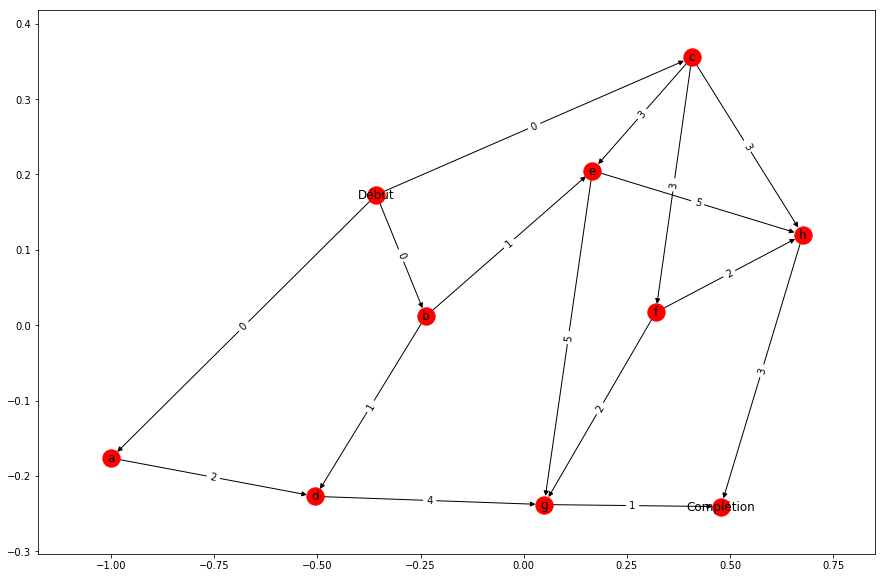

In [12]:
positions = nx.spring_layout(ordo)
nx.draw_networkx(ordo, pos=positions)
arretes = nx.get_edge_attributes(ordo, "durée")
textes = nx.draw_networkx_edge_labels(ordo, positions, edge_labels=arretes)

# Remarque/Exercice

Si on a une boucle dans le graphe les prérequis sont contradictoires. Déterminer si `ordo` est un **DAG** (Directed Acyclic Graph).

In [13]:
nx.algorithms.is_directed_acyclic_graph(ordo)

True

**Il y a au moins une (en pratique beaucoup) façon de satisfaire les prérequis.**

# Remarque

Si jamais il n'y a pas d'arrête partant de **Début** ou arrivant en **Complétion** on peut montrer qu'il y a forcément une boucle dans le graphe.

# Exercice 

Déterminer l'agencement des tâches avec networkx.

In [15]:
print("plus long chemin : ", nx.algorithms.dag_longest_path(ordo, weight="durée"))
print("longueur de ce chemin : ", nx.algorithms.dag_longest_path_length(ordo, weight="durée"))

plus long chemin :  ['Début', 'c', 'e', 'h', 'Complétion']
longueur de ce chemin :  11


# Exercice

En pratique les tâches **d** et **f** ne peuvent pas être réalisées simultanément, quel est l'agencement optimal des tâches?

On constate que dans cette situation soit **d** sera effectuée avant **f** soit le contraire on va donc regarder les chemins le plus long en ajoutant
- **d** comme prérequis à **f**
- **f** comme prérequis à **d**  

puis prendre le meilleur des deux cas.

In [24]:
ordo1 = nx.DiGraph()
ordo1.add_weighted_edges_from(
    [
        ("Début", "a", 0),
        ("Début", "b", 0),
        ("Début", "c", 0),
        ("a", "d", 2),
        ("b", "d", 1),
        ("b", "e", 1),
        ("c", "e", 3),
        ("c", "f", 3),
        ("c", "h", 3),
        ("d", "g", 4),
        ("e", "g", 5),
        ("e", "h", 5),
        ("f", "g", 2),
        ("f", "h", 2),
        ("g", "Complétion", 1),
        ("h", "Complétion", 3),
        ("f", "d", 2),
    ],
    weight="durée"
)

In [25]:
nx.algorithms.is_directed_acyclic_graph(ordo1)

True

In [26]:
print("longueur : ", nx.algorithms.dag_longest_path_length(ordo1, weight="durée"))
print("chemin : ", nx.algorithms.dag_longest_path(ordo1, weight="durée"))

longueur :  11
chemin :  ['Début', 'c', 'e', 'h', 'Complétion']


In [27]:
ordo2 = nx.DiGraph()
ordo2.add_weighted_edges_from(
    [
        ("Début", "a", 0),
        ("Début", "b", 0),
        ("Début", "c", 0),
        ("a", "d", 2),
        ("b", "d", 1),
        ("b", "e", 1),
        ("c", "e", 3),
        ("c", "f", 3),
        ("c", "h", 3),
        ("d", "g", 4),
        ("e", "g", 5),
        ("e", "h", 5),
        ("f", "g", 2),
        ("f", "h", 2),
        ("g", "Complétion", 1),
        ("h", "Complétion", 3),
        ("d", "f", 4),
    ],
    weight="durée"
)

In [28]:
print("longueur : ", nx.algorithms.dag_longest_path_length(ordo2, weight="durée"))
print("chemin : ", nx.algorithms.dag_longest_path(ordo2, weight="durée"))

longueur :  11
chemin :  ['Début', 'c', 'e', 'h', 'Complétion']
